# PROJECT TITLE: Wine Quality Unsupervised Learning Project

 In this project, we aim to discover underlying structures in the "red wine quality" dataset using unsupervised learning.
 We will apply clustering (K-Means and Agglomerative Clustering) to identify natural groupings of wines based solely on chemical features.
 We will then interpret these clusters and see if they correlate with known quality ratings.

 Steps:
 1. Load and explore the dataset
 2. EDA: distributions, correlations, missing values, outliers
 3. Preprocess data: scaling
 4. Apply clustering methods (K-Means, Agglomerative)
 5. Determine the number of clusters using silhouette score
 6. Analyze results and provide conclusions

 Deliverables:
 - This notebook as the main analysis file
 - A short video presentation highlighting the approach and findings (done separately)
 - A public GitHub repository hosting the code and instructions

In [2]:
# Cell 2: Imports and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Set plot styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Load dataset (ensure 'winequality-red.csv' is in the same directory)
data = pd.read_csv('winequality-red.csv', sep=';')

print("Data loaded successfully.")
data.head()


Data loaded successfully.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Cell 3: Basic Data Checks

print("Data shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nData info:")
data.info()

print("\nMissing values:\n", data.isnull().sum())

# No missing values.


Data shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 1

In [4]:
# Cell 4: Basic Statistics
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


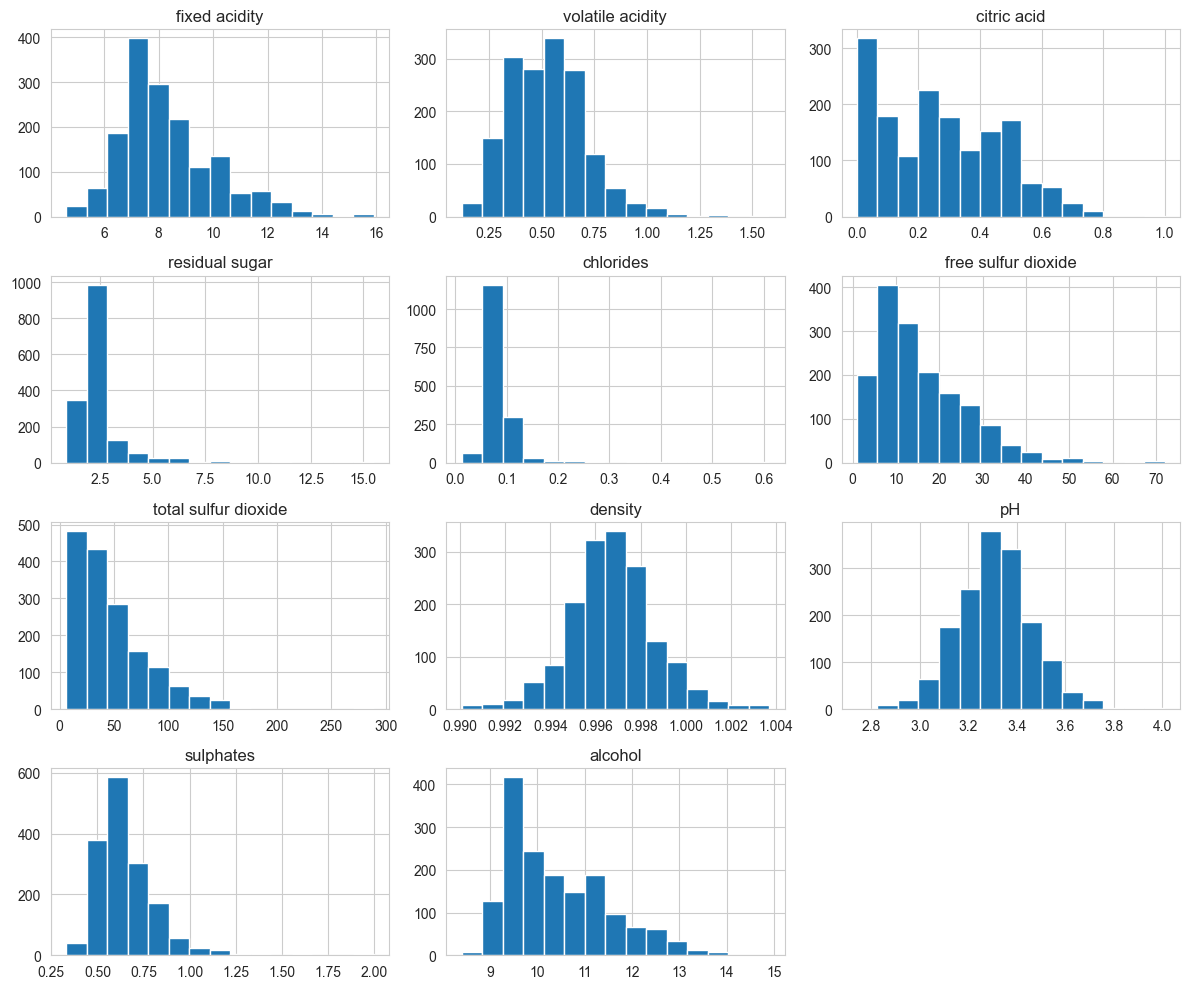

In [5]:
# Cell 5: EDA - Distributions of Each Feature

# We will use all chemical features for clustering and exclude 'quality' from the features used for clustering.
features = data.drop('quality', axis=1)

features.hist(bins=15, figsize=(12,10), layout=(4,3))
plt.tight_layout()
plt.show()


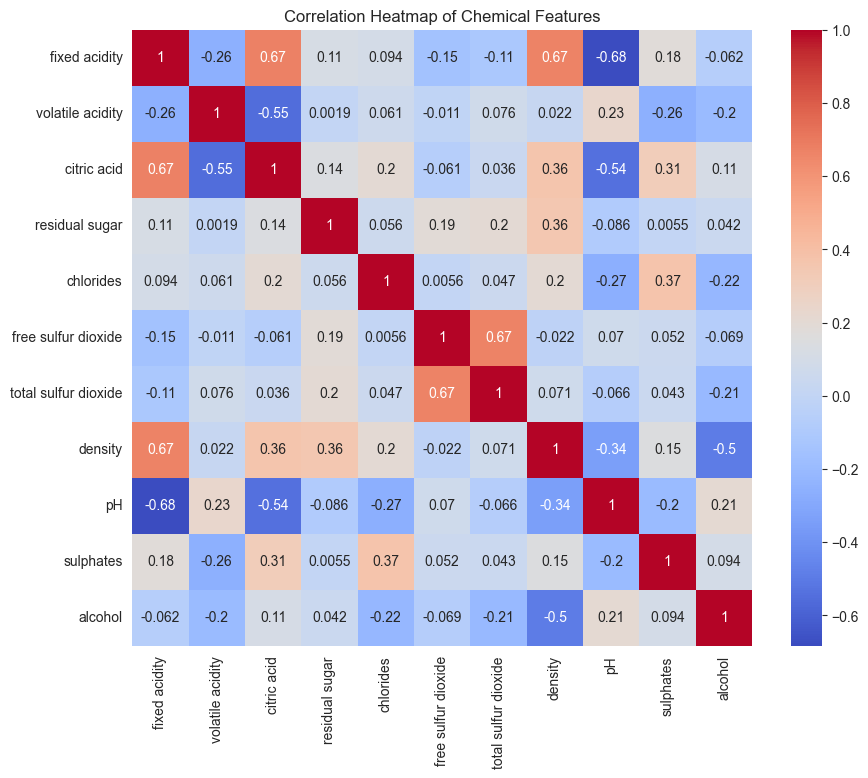

In [6]:
# Cell 6: EDA - Correlation Analysis

corr = features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Chemical Features')
plt.show()


In [7]:
# Cell 8: Data Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print("Data scaling complete.")


Data scaling complete.


Explained variance by first two components: [0.28173931 0.1750827 ]


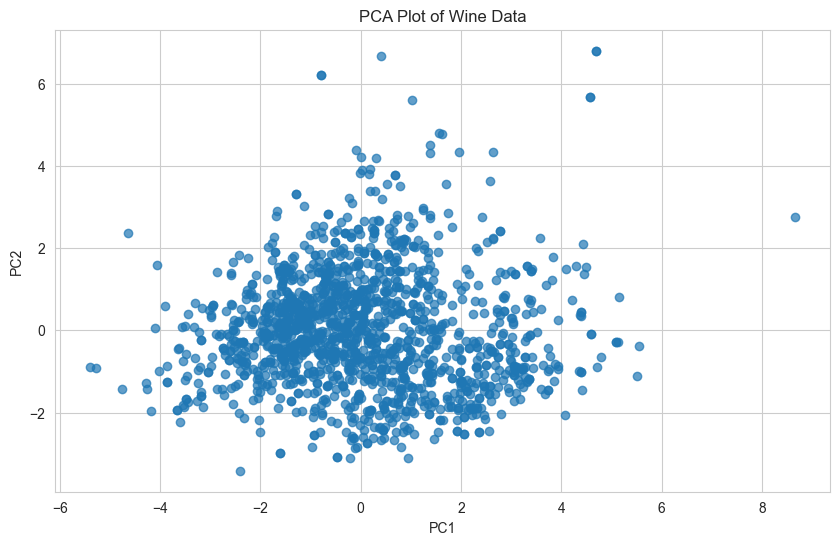

In [8]:
# Cell 9: PCA for Visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by first two components:", pca.explained_variance_ratio_)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title('PCA Plot of Wine Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


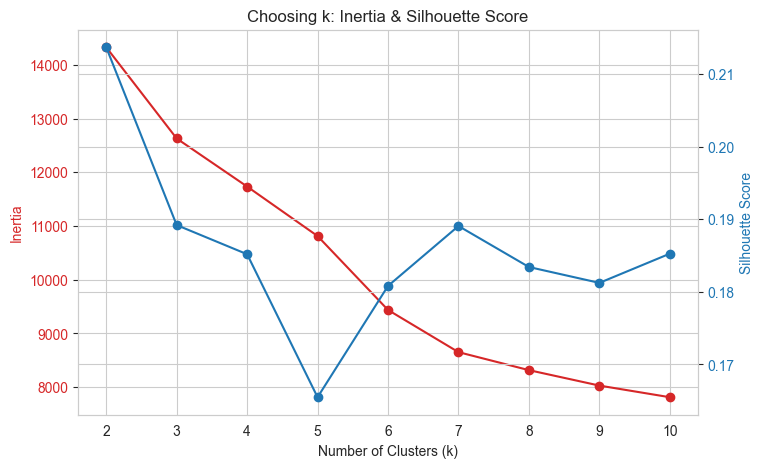

Chosen number of clusters: 4


In [9]:
# Cell 10: Selecting Number of Clusters (K-Means)

inertias = []
silhouettes = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_k = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels_k)
    silhouettes.append(sil)

fig, ax1 = plt.subplots(figsize=(8,5))
color_inertia = 'tab:red'
color_sil = 'tab:blue'

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color_inertia)
ax1.plot(K, inertias, 'o-', color=color_inertia)
ax1.tick_params(axis='y', labelcolor=color_inertia)

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color=color_sil)
ax2.plot(K, silhouettes, 'o-', color=color_sil)
ax2.tick_params(axis='y', labelcolor=color_sil)

plt.title('Choosing k: Inertia & Silhouette Score')
plt.show()

# Let's choose k=4 for demonstration.
best_k = 4
print(f"Chosen number of clusters: {best_k}")


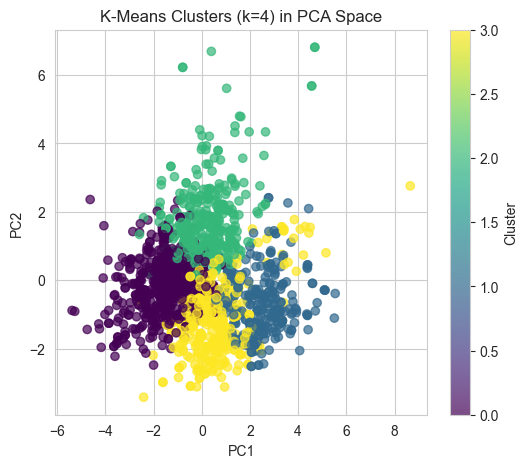

In [10]:
# Cell 11: K-Means Clustering with k=4

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)

data['cluster_kmeans'] = labels_kmeans

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters (k=4) in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [11]:
# Cell 12: Analyze K-Means Clusters

cluster_means = data.groupby('cluster_kmeans').mean()
print("Cluster Means:\n", cluster_means)

quality_by_cluster = data.groupby('cluster_kmeans')['quality'].mean()
print("\nAverage quality by K-Means cluster:\n", quality_by_cluster)


Cluster Means:
                 fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_kmeans                                                                 
0                    7.200300          0.630832     0.105037        2.213418   
1                   11.153676          0.431305     0.502243        2.934191   
2                    8.122191          0.545983     0.284213        3.103652   
3                    8.471053          0.366891     0.412632        2.237500   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
cluster_kmeans                                                         
0                0.079769            13.279610             34.940030   
1                0.089331            10.588235             31.584559   
2                0.088149            27.172753             90.648876   
3                0.101888            13.069079             33.338816   

                 density        pH  sulphates    alcohol   quality  
c

Silhouette for Agglomerative Clustering (k=4): 0.1714
Silhouette for K-Means (k=4): 0.1852


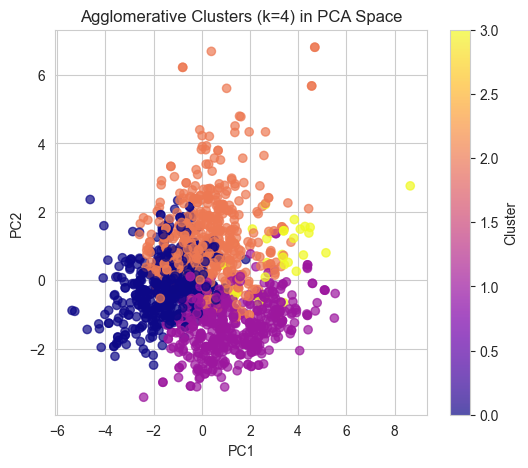

Average quality by Agglomerative cluster:
 cluster_agg
0    5.434022
1    6.119469
2    5.465979
3    5.363636
Name: quality, dtype: float64


In [12]:
# Cell 13: Agglomerative Clustering for Comparison

agg = AgglomerativeClustering(n_clusters=best_k)
labels_agg = agg.fit_predict(X_scaled)
data['cluster_agg'] = labels_agg

sil_agg = silhouette_score(X_scaled, labels_agg)
print(f"Silhouette for Agglomerative Clustering (k={best_k}): {sil_agg:.4f}")

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette for K-Means (k={best_k}): {sil_kmeans:.4f}")

# Visualize Agglomerative Clusters in PCA space
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg, cmap='plasma', alpha=0.7)
plt.title('Agglomerative Clusters (k=4) in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.show()

quality_by_cluster_agg = data.groupby('cluster_agg')['quality'].mean()
print("Average quality by Agglomerative cluster:\n", quality_by_cluster_agg)


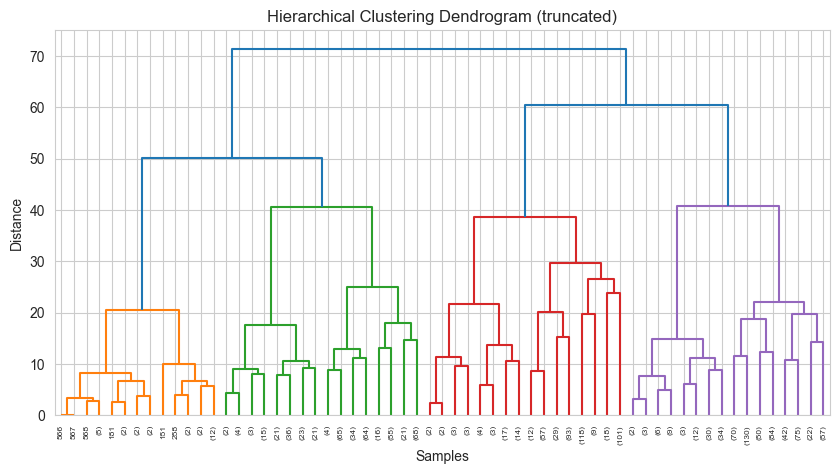

In [13]:
# Cell 14: Hierarchical Clustering Dendrogram (Optional)

Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


# Cell 15: Discussion and Conclusion

 Discussion:
 - We used K-Means and Agglomerative Clustering to group wines by chemical features.
 - Chose k=4 clusters using silhouette and inertia as guides for K-Means.
 - Clusters show differences in chemical composition.
 - Interestingly, some clusters have higher mean quality, suggesting that chemical attributes influence quality.

 Conclusion:
 Unsupervised clustering reveals hidden structure in the wine data, potentially guiding wine selection, 
 production improvements, or quality assessments.

Unsupervised clustering identified distinct groups of wines, with some correlating to higher quality.
